### Nama  : Muhamad Jafar Rahadian
### Email : muhammadjafar954@gmail.com
### Nama Proyek : Analisis Sentimen Ulasan Pengguna pada Aplikasi MiChat di Google Play Store

# 1. Melakukan Unduh dan Import Library

In [112]:
# tidak semua perangkat memiliki library python yang sama, maka dari itu diperlukan pengunduhan library terlebih dahulu.
!pip install google-play-scraper
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install datetime
!pip install nltk
!pip install Sastrawi
!pip install wordcloud
!pip install scikit-learn
!pip install gensim

In [113]:
#Import library yang dibutuhkan
from google_play_scraper import app, reviews, Sort, reviews_all

import numpy as np
seed = 0
np.random.seed(seed)

import pandas as pd
pd.options.mode.chained_assignment = None

import csv
import datetime as dt
import matplotlib.pyplot as plt
import nltk
import re
import requests
import seaborn as sns
import string

from gensim.models import Word2Vec
from io import StringIO
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from wordcloud import WordCloud


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier

nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# 2. Scraping Dataset

In [114]:
# Mengambil semua ulasan dari aplikasi MiChat dengan ID 'com.michat.im' di Google Play Store.
scrapreview = reviews_all(
    'com.michatapp.im',      # ID aplikasi
    lang='id',               # Bahasa ulasan (menggunakan 'id' bahasa indonesia)
    country='id',            # Negara ('id' negara indonesia)
    sort=Sort.NEWEST,        # Urutan ulasan ('NEWEST' artinya terbaru)
    count=40000              # Jumlah maksimum ulasan yang ingin diambil
)

In [115]:
#Dataset yang sudah diunduh selanjutnya akan disimpan dalam bentuk .CSV
with open('ulasan_michat.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Review'])
    for review in scrapreview:
        writer.writerow([review['content']])

# 3. Menampilkan Dataset

In [116]:
#Menampilkan dataset yang berupa ulasan aplikasi dalam bentuk tabel menggunakan library pandas
app_reviews_df = pd.DataFrame(scrapreview)
app_reviews_df.shape
app_reviews_df.head()
app_reviews_df.to_csv('ulasan_michat.csv', index=False)

In [117]:
# Membuat DataFrame dari hasil scrapreview
app_reviews_df = pd.DataFrame(scrapreview)

# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape

In [118]:
# Menampilkan lima baris pertama dan terakhir dari dataset
app_reviews_df.head()
app_reviews_df.tail()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
188995,2b54585e-f516-479c-9d0d-5e0b5a677859,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,👌👌👌,5,0,1.3.241,2021-08-23 02:25:01,None,NaT,1.3.241
188996,96f5e842-e676-4c1a-8bbe-76d90c740c12,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Lapor pak apk miChat dijadikan ajang prostitusi dan penipuan ya ???,1,0,None,2021-08-23 02:21:26,None,NaT,None
188997,97a8a287-75df-41fd-a4b1-6a7a2a05a700,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Good,5,0,1.3.241,2021-08-23 02:19:32,None,NaT,1.3.241
188998,d300effb-cffb-48b0-8919-d68a67fd0555,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Aku menyukai ini bagus sekali,5,0,1.3.230,2021-08-23 02:09:01,None,NaT,1.3.230
188999,e36d1c6c-d28c-4912-b766-84a00ef50690,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Gak jelas,1,0,None,2021-08-23 01:59:18,None,NaT,None


In [119]:
# Menampilkan informasi tentang DataFrame pada Dataset
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189000 entries, 0 to 188999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              189000 non-null  object        
 1   userName              189000 non-null  object        
 2   userImage             189000 non-null  object        
 3   content               189000 non-null  object        
 4   score                 189000 non-null  int64         
 5   thumbsUpCount         189000 non-null  int64         
 6   reviewCreatedVersion  132048 non-null  object        
 7   at                    189000 non-null  datetime64[ns]
 8   replyContent          124 non-null     object        
 9   repliedAt             124 non-null     datetime64[ns]
 10  appVersion            132048 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 15.9+ MB


In [120]:
# Mengubah DataFrame dengan clean_df, yaitu dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari dataset
clean_df = app_reviews_df.dropna()

In [121]:
#  DataFrame setelah membersihkan nilai yang hilang (NaN), tidak akan ada perubahan jika dataset memang tidak memiliki nilai NaN
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 4020 to 186872
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              121 non-null    object        
 1   userName              121 non-null    object        
 2   userImage             121 non-null    object        
 3   content               121 non-null    object        
 4   score                 121 non-null    int64         
 5   thumbsUpCount         121 non-null    int64         
 6   reviewCreatedVersion  121 non-null    object        
 7   at                    121 non-null    datetime64[ns]
 8   replyContent          121 non-null    object        
 9   repliedAt             121 non-null    datetime64[ns]
 10  appVersion            121 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 11.3+ KB


In [122]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

# 4. Preprocessing Data

In [123]:
# 1. Cleaning Text(Membersihkan dan mengganti beberapa karakter pada dataset)
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip(' ')
    return text

# 2. Case Folding(Merubah semua karakter menjadi huruf kecil)
def casefoldingText(text):
    text = text.lower()
    return text

# 3. Tokenizing(Membagi teks ke daftar kata(token))
def tokenizingText(text):
    text = word_tokenize(text)
    return text

# 4. Filtering(Menghapus kata-kata berhenti)
def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

# 5. Stemming(Mengubah kata berimbuhan menjadi kata dasar)
def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text

# 6. toSentence(Menggabungkan daftar kata menjadi sebuah kalimat)
def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

In [124]:
# Membantu mengartikan kata kata slang atau bahasa gaul ke bahasa formal
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [125]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
4020,f2671a53-1e8c-40c8-b19f-f15cba26afdb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,bagus x,5,0,1.4.503,2024-12-08 15:20:06,Thank you.,2019-07-06 04:15:07,1.4.503
5168,ea939cb7-6f04-4ed6-9e79-58123dfe5acc,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Like it... komunikatif👍👌,5,5,1.4.495,2024-11-26 07:55:06,Thank you.,2019-06-06 19:48:05,1.4.495
12629,70f8b4e5-d518-4de3-a72c-4f34e39a7646,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Michat error terus uda berhari2.. Kapan normalnya ini..,1,4,1.4.454,2024-09-15 05:19:22,Thank you.,2019-07-06 02:10:07,1.4.454
14854,2e2e2876-78b9-404f-a9d8-5f7741594980,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Sekarang malah kurang terasa bagusnya, karena tak bisa melakukan panggilan telepon",5,0,1.4.445,2024-08-26 02:47:30,Thank you.,2019-09-10 15:30:11,1.4.445
19065,be133fce-5ac9-4067-a37e-78fe63552543,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Coba lagi 🙏 mantap 👍,4,0,1.4.424,2024-07-16 08:05:14,Thank you.,2019-10-22 13:00:06,1.4.424
...,...,...,...,...,...,...,...,...,...,...,...
178857,61efe8fa-f58d-4007-b6e2-30aa2c4dcabd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Sedikit susah sekarang cari teman,3,0,1.1.8,2021-10-04 12:42:10,Thank you.,2019-07-28 03:20:06,1.1.8
181630,6b13e7c1-2651-40a2-91ac-4a68cd329d35,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Ada penyebaran uang palsu di wilayah kota Jambi.dng terang-terangan menawarkan di akun Michat nya. Diharapkan pihak michat segera menindak lanjutkan ini,karena ini merugikan Negara Republik Indonesia",5,43,1.4.14,2021-09-28 07:09:12,Thank you.,2019-08-23 01:20:07,1.4.14
182276,ec5dfd8f-d0d7-4813-b01a-afdbe764ca11,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Mantap,5,0,1.4.13,2021-09-27 15:59:47,Thank you.,2019-12-07 14:30:10,1.4.13
184823,22f5dc47-02c5-41f9-810d-eacad0a97949,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Hilangkan waria nya donk.. Knpa g bsa bwt tlp lgi.. trus share lokasi g bsa d pake,5,1,1.4.14,2021-09-15 13:53:27,Thank you.,2019-09-12 03:20:05,1.4.14


In [126]:
# Data yang sudah dilakukan Preprocessing selanjutnya akan disimpan di kolom baru seperti berikut
clean_df = pd.DataFrame(scrapreview)
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [127]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,a9771057-c3b2-432d-9e06-f99469483989,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,tolong munculkan pengguna sekitar dan penyapa,2,0,1.4.525,2025-01-13 16:02:08,None,NaT,1.4.525,tolong munculkan pengguna sekitar dan penyapa,tolong munculkan pengguna sekitar dan penyapa,tolong munculkan pengguna sekitar dan penyapa,"[tolong, munculkan, pengguna, sekitar, dan, penyapa]","[tolong, munculkan, pengguna, penyapa]",tolong munculkan pengguna penyapa
1,a77b1a08-baae-46b3-b60e-292ecc831c8b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Iklan iklan dan iklan,1,0,1.4.525,2025-01-13 15:45:59,None,NaT,1.4.525,Iklan iklan dan iklan,iklan iklan dan iklan,iklan iklan dan iklan,"[iklan, iklan, dan, iklan]","[iklan, iklan, iklan]",iklan iklan iklan
2,f85da1fd-de90-4525-a2ab-2dd36f6268a9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Terlalu banyak iklannya sehingga sangat mengganggu.kl bisa dikurangi iklannya,2,0,None,2025-01-13 15:42:06,None,NaT,None,Terlalu banyak iklannya sehingga sangat mengganggukl bisa dikurangi iklannya,terlalu banyak iklannya sehingga sangat mengganggukl bisa dikurangi iklannya,terlalu banyak iklannya sehingga sangat mengganggukl bisa dikurangi iklannya,"[terlalu, banyak, iklannya, sehingga, sangat, mengganggukl, bisa, dikurangi, iklannya]","[iklannya, mengganggukl, dikurangi, iklannya]",iklannya mengganggukl dikurangi iklannya
3,b19e8259-094f-4864-afed-17bf27cf22e4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Mantap,5,0,1.4.525,2025-01-13 15:35:47,None,NaT,1.4.525,Mantap,mantap,mantap,[mantap],[mantap],mantap
4,25afa8a6-1f16-47ee-af86-575e9da2d01d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,oke,5,0,1.4.525,2025-01-13 15:32:53,None,NaT,1.4.525,oke,oke,oke,[oke],[oke],oke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188995,2b54585e-f516-479c-9d0d-5e0b5a677859,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,👌👌👌,5,0,1.3.241,2021-08-23 02:25:01,None,NaT,1.3.241,,,,[],[],
188996,96f5e842-e676-4c1a-8bbe-76d90c740c12,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Lapor pak apk miChat dijadikan ajang prostitusi dan penipuan ya ???,1,0,None,2021-08-23 02:21:26,None,NaT,None,Lapor pak apk miChat dijadikan ajang prostitusi dan penipuan ya,lapor pak apk michat dijadikan ajang prostitusi dan penipuan ya,lapor pak apk michat dijadikan ajang prostitusi dan penipuan iya,"[lapor, pak, apk, michat, dijadikan, ajang, prostitusi, dan, penipuan, iya]","[lapor, apk, michat, dijadikan, ajang, prostitusi, penipuan]",lapor apk michat dijadikan ajang prostitusi penipuan
188997,97a8a287-75df-41fd-a4b1-6a7a2a05a700,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Good,5,0,1.3.241,2021-08-23 02:19:32,None,NaT,1.3.241,Good,good,good,[good],[good],good
188998,d300effb-cffb-48b0-8919-d68a67fd0555,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Aku menyukai ini bagus sekali,5,0,1.3.230,2021-08-23 02:09:01,None,NaT,1.3.230,Aku menyukai ini bagus sekali,aku menyukai ini bagus sekali,aku menyukai ini bagus sekali,"[aku, menyuka

# 5. Pelabelan

In [128]:
# Membaca data kamus kata-kata positif yang didapat dari lexicon dan bersumber dari GitHub ibu angel
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif yang didapat dari lexicon dan bersumber dari GitHub ibu angel
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:

        lexicon_negative[row[0]] = int(row[1])

else:
    print("Failed to fetch negative lexicon data")


In [129]:
# Menentukan polaritas sentimen dari tweet menggunakan Dataset yang tersedia di Github Lexicon

def sentiment_analysis_lexicon_indonesia(text):
    score = 0

    for word in text:

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''

    if (score > 1):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < -1):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif
    else:
        polarity = 'neutral'
        # jika tidak keduanya maka polaritas adalah netral

    return score, polarity

In [130]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
neutral     74476
positive    63411
negative    51113
Name: count, dtype: int64


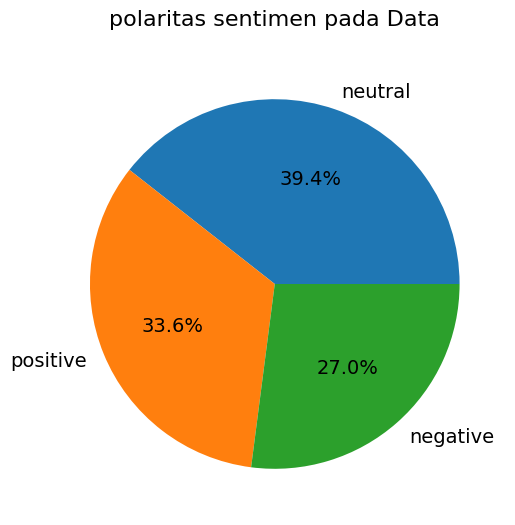

In [131]:
# Memenampilkan plot hasil polarisasi kata.
fig, ax = plt.subplots(figsize=(6, 6))

sizes = [count for count in clean_df['polarity'].value_counts()]
labels = list(clean_df['polarity'].value_counts().index)
explode = (0, 0, 0)

ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})
ax.set_title('polaritas sentimen pada Data', fontsize=16, pad=20)
plt.show()

In [132]:
# Mengatur opsi tampilan Pandas untuk polaritas positif
pd.set_option('display.max_colwidth', 100000)
positive_tweets = clean_df[clean_df['polarity'] == 'positive']
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)
positive_tweets = positive_tweets.reset_index(drop=True)
positive_tweets.index += 1

In [133]:
# Mengatur opsi tampilan Pandas untuk polaritas negatif
pd.set_option('display.max_colwidth', 100000)
negative_tweets = clean_df[clean_df['polarity'] == 'negative']
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)
negative_tweets = negative_tweets.reset_index(drop=True)
negative_tweets.index += 1

In [134]:
# Mengatur opsi tampilan Pandas untuk polaritas netral
pd.set_option('display.max_colwidth', 100000)
neutral_tweets = clean_df[clean_df['polarity'] == 'neutral']
neutral_tweets = neutral_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
neutral_tweets = neutral_tweets.sort_values(by='polarity_score', ascending=False)
neutral_tweets = neutral_tweets.reset_index(drop=True)
neutral_tweets.index += 1

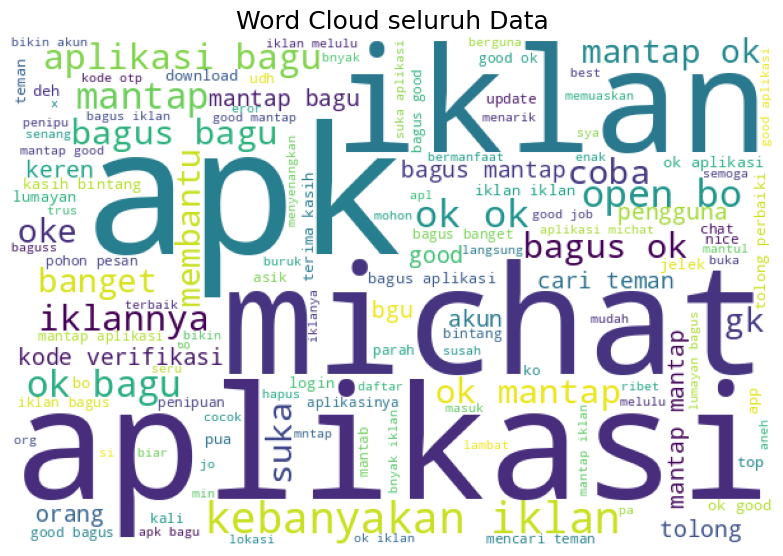

In [135]:
# Membuat wordcloud keseluruhan
list_words = ''

for tweet in clean_df['text_stopword']:
    for word in tweet:
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud seluruh Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

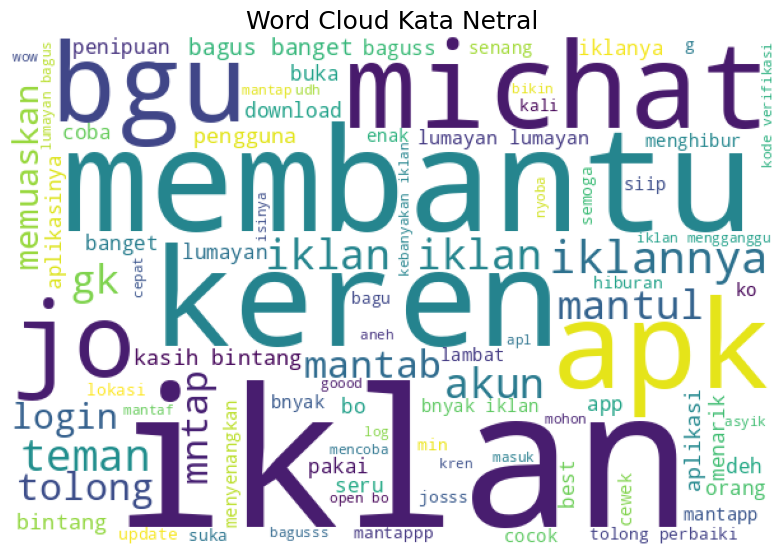

In [136]:
# Membuat Wordcloud untuk kata netral
list_words_neutral = ''
for tweet in neutral_tweets['text_stopword']:
    for word in tweet:
        list_words_neutral += ' ' + (word)

wordcloud_neutral = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words_neutral)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud Kata Netral', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud_neutral))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

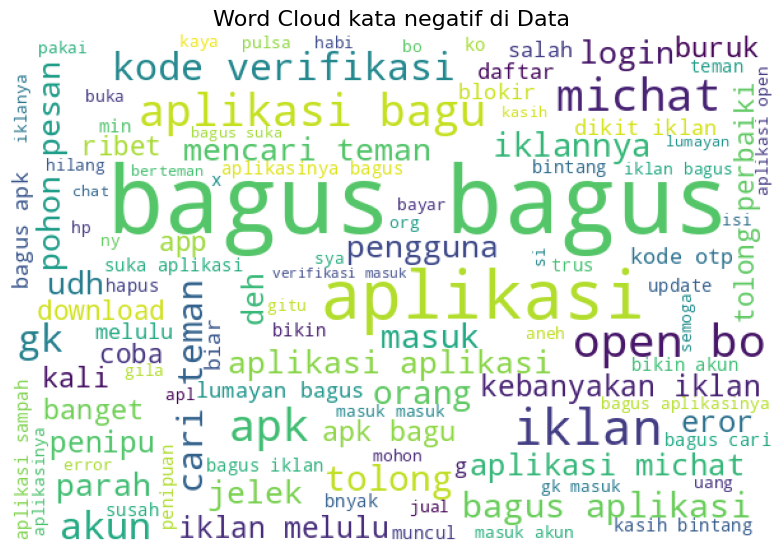

In [137]:
# Membuat Wordcloud untuk kata negatif
list_words = ''
for tweet in negative_tweets['text_stopword']:
    for word in tweet:
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud kata negatif di Data', fontsize=16)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

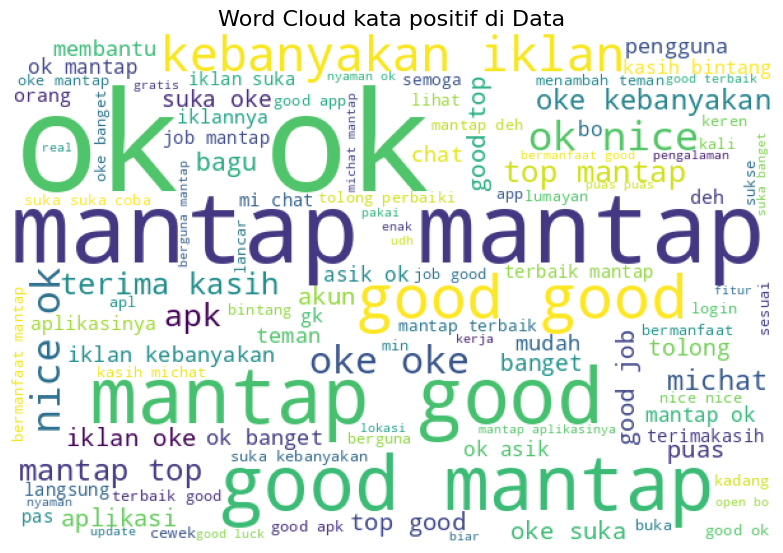

In [138]:
# Membuat Wordcloud untuk kata positif
list_words = ''
for tweet in positive_tweets['text_stopword']:
    for word in tweet:
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud kata positif di Data', fontsize=16)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

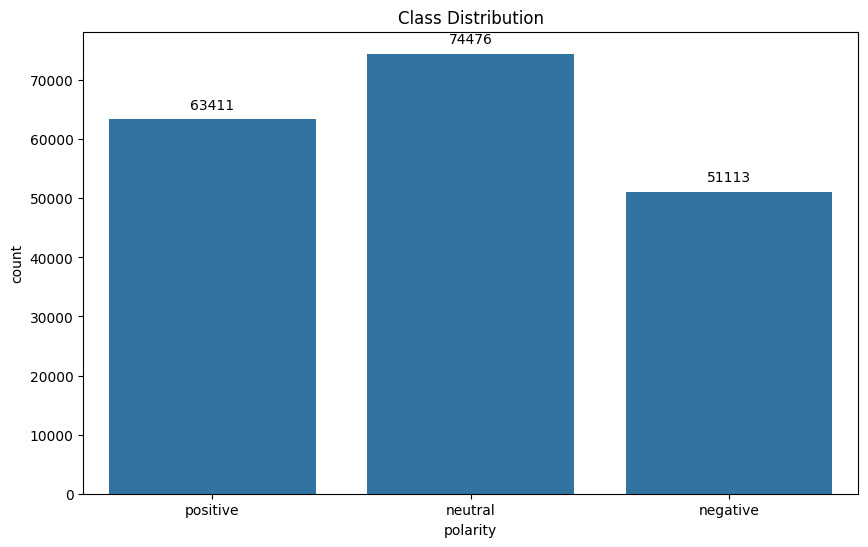

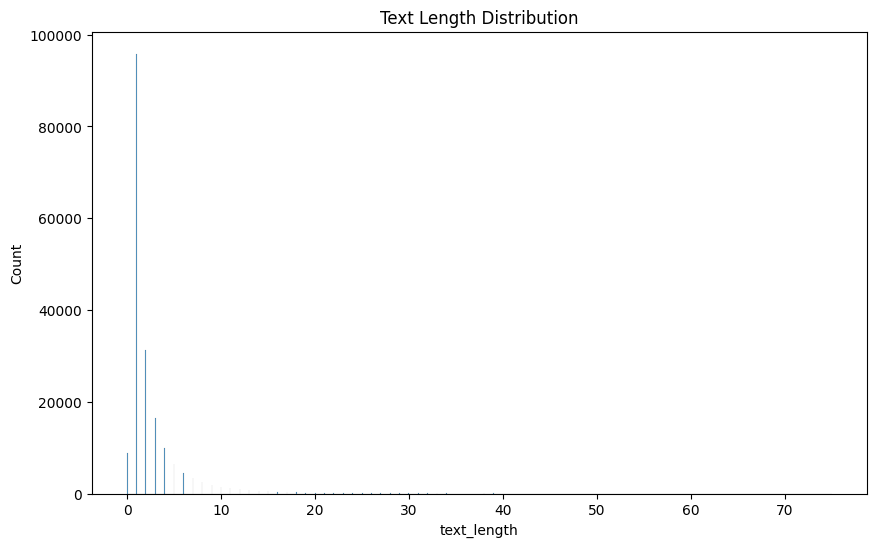

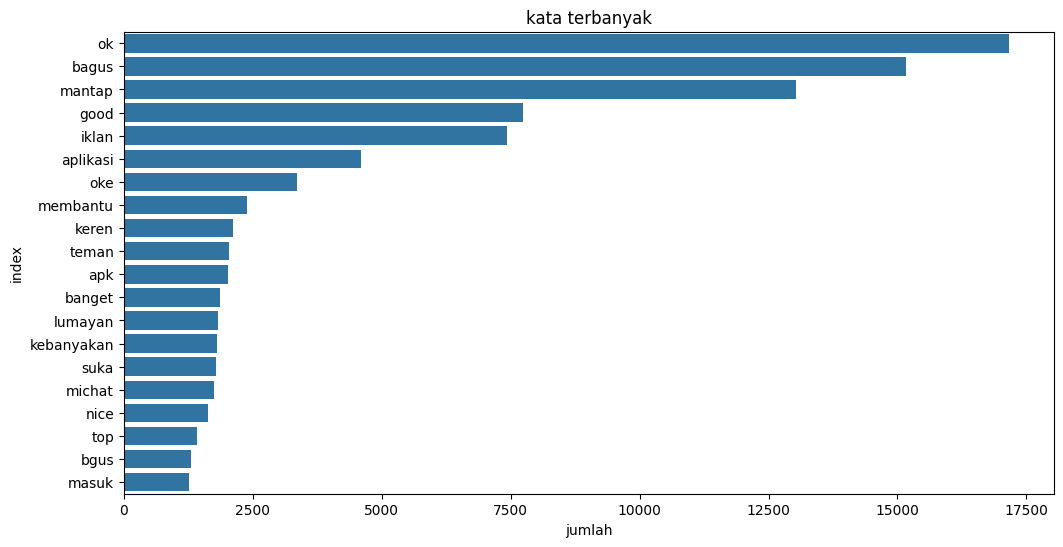

In [139]:
# Menampilkan grafik untuk polaritas
plt.figure(figsize=(10, 6))
class_dist_plot = sns.countplot(x='polarity', data=clean_df)

plt.title('Class Distribution')
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')
plt.show()

plt.figure(figsize=(10, 6))
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

plt.figure(figsize=(12, 6))
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('kata terbanyak')
plt.show()

# 6. Pemecahan Data

In [140]:
clean_df.head(2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity,text_length
0,a9771057-c3b2-432d-9e06-f99469483989,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,tolong munculkan pengguna sekitar dan penyapa,2,0,1.4.525,2025-01-13 16:02:08,None,NaT,1.4.525,tolong munculkan pengguna sekitar dan penyapa,tolong munculkan pengguna sekitar dan penyapa,tolong munculkan pengguna sekitar dan penyapa,"[tolong, munculkan, pengguna, sekitar, dan, penyapa]","[tolong, munculkan, pengguna, penyapa]",tolong munculkan pengguna penyapa,2,positive,4
1,a77b1a08-baae-46b3-b60e-292ecc831c8b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Iklan iklan dan iklan,1,0,1.4.525,2025-01-13 15:45:59,None,NaT,1.4.525,Iklan iklan dan iklan,iklan iklan dan iklan,iklan iklan dan iklan,"[iklan, iklan, dan, iklan]","[iklan, iklan, iklan]",iklan iklan iklan,0,neutral,3


In [141]:
# Pisahkan data menjadi fitur(tweet) dan label(sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

In [142]:
# Ekstraksi Fitur untuk Word2vec
model_w2v = Word2Vec(sentences=clean_df['text_stopword'], vector_size=100, window=5, min_count=5, sg=1)

In [143]:
def document_vector(doc):
       doc_vec = np.zeros((model_w2v.vector_size,), dtype="float32")
       num_words = 0
       for word in doc:
           if word in model_w2v.wv:
               doc_vec = np.add(doc_vec, model_w2v.wv[word])
               num_words += 1
       if num_words > 0:
           doc_vec = np.divide(doc_vec, num_words)
       return doc_vec
X_w2v = clean_df['text_stopword'].apply(lambda x: document_vector(x)).to_list()
X_w2v = np.array(X_w2v)

In [144]:
# Contoh penggunaan dengan w2v:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# For training data:
X_train_w2v = clean_df.loc[y_train.index, 'text_stopword'].apply(lambda x: document_vector(x)).to_list()
X_train_w2v = np.array(X_train_w2v)

# For testing data:
X_test_w2v = clean_df.loc[y_test.index, 'text_stopword'].apply(lambda x: document_vector(x)).to_list()
X_test_w2v = np.array(X_test_w2v)

# Scale the Word2Vec features:
scaler = StandardScaler()
X_train_w2v_scaled = scaler.fit_transform(X_train_w2v)
X_test_w2v_scaled = scaler.transform(X_test_w2v)

In [145]:
# Ekstraksi fitur menggunakan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

In [146]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
features_df

,admin,akun,akurat,aneh,apk,apl,aplikasi,aplikasinya,app,asik,...,tolong,top,trus,uang,udh,ulang,update,verifikasi,wanita,yah
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.650623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188995,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188996,0.0,0.0,0.0,0.0,0.401614,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188997,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188998,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
# Membagi data menjadi data latih : 65% dan data uji : 35%
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.35, random_state=42)

# 7. Pengujian menggunakan Naive Bayes

In [148]:
naive_bayes = BernoulliNB()
naive_bayes.fit(X_train.toarray(), y_train)

y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())

accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)

print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)

Naive Bayes - accuracy_train: 0.8762474562474563
Naive Bayes - accuracy_test: 0.8760241874527589


In [149]:
naive_bayes_w2v = BernoulliNB()
naive_bayes_w2v.fit(X_train_w2v, y_train)

y_pred_train_nb_w2v = naive_bayes_w2v.predict(X_train_w2v)
y_pred_test_nb_w2v = naive_bayes_w2v.predict(X_test_w2v)

accuracy_train_nb_w2v = accuracy_score(y_pred_train_nb_w2v, y_train)
accuracy_test_nb_w2v = accuracy_score(y_pred_test_nb_w2v, y_test)

print('Naive Bayes with Word2Vec - accuracy_train:', accuracy_train_nb_w2v)
print('Naive Bayes with Word2Vec - accuracy_test:', accuracy_test_nb_w2v)

Naive Bayes with Word2Vec - accuracy_train: 0.6745787545787546
Naive Bayes with Word2Vec - accuracy_test: 0.6744520030234316


# 8. Pengujian Menggunakan Random Forest Classifier

In [150]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train.toarray(), y_train)

y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9424989824989825
Random Forest - accuracy_test: 0.9104610733182161


In [151]:
random_forest_w2v = RandomForestClassifier()
random_forest_w2v.fit(X_train_w2v, y_train)

y_pred_train_rf_w2v = random_forest_w2v.predict(X_train_w2v)
y_pred_test_rf_w2v = random_forest_w2v.predict(X_test_w2v)

accuracy_train_rf_w2v = accuracy_score(y_pred_train_rf_w2v, y_train)
accuracy_test_rf_w2v = accuracy_score(y_pred_test_rf_w2v, y_test)

print('Random Forest dengan w2v - accuracy_train:', accuracy_train_rf_w2v)
print('Random Forest dengan w2v - accuracy_test:', accuracy_test_rf_w2v)

Random Forest dengan w2v - accuracy_train: 0.9974521774521774
Random Forest dengan w2v - accuracy_test: 0.9134996220710506


# 9. Pengujian menggunakan Logistic Regression

In [152]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train.toarray(), y_train)

y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.9103215303215303
Logistic Regression - accuracy_test: 0.9094179894179895


In [153]:
logistic_regression_w2v = LogisticRegression()
logistic_regression_w2v.fit(X_train_w2v, y_train)

y_pred_train_lr_w2v = logistic_regression_w2v.predict(X_train_w2v)
y_pred_test_lr_w2v = logistic_regression_w2v.predict(X_test_w2v)

accuracy_train_lr_w2v = accuracy_score(y_pred_train_lr_w2v, y_train)

accuracy_test_lr_w2v = accuracy_score(y_pred_test_lr_w2v, y_test)

print('Logistic Regression dengan w2v - accuracy_train:', accuracy_train_lr_w2v)
print('Logistic Regression dengan w2v - accuracy_test:', accuracy_test_lr_w2v)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression dengan w2v - accuracy_train: 0.8438746438746438
Logistic Regression dengan w2v - accuracy_test: 0.8442479213907785


# 10. Pengujian menggunakan Decission Tree

In [154]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train.toarray(), y_train)

y_pred_train_dt = decision_tree.predict(X_train.toarray())
y_pred_test_dt = decision_tree.predict(X_test.toarray())

accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)

print('Decision Tree - accuracy_train:', accuracy_train_dt)
print('Decision Tree - accuracy_test:', accuracy_test_dt)

Decision Tree - accuracy_train: 0.9424989824989825
Decision Tree - accuracy_test: 0.9023733938019652


In [155]:
decision_tree_w2v = DecisionTreeClassifier()
decision_tree_w2v.fit(X_train_w2v, y_train)

y_pred_train_dt_w2v = decision_tree_w2v.predict(X_train_w2v)
y_pred_test_dt_w2v = decision_tree_w2v.predict(X_test_w2v)

accuracy_train_dt_w2v = accuracy_score(y_pred_train_dt_w2v, y_train)
accuracy_test_dt_w2v = accuracy_score(y_pred_test_dt_w2v, y_test)

print('Decision Tree - accuracy_train:', accuracy_train_dt_w2v)
print('Decision Tree - accuracy_test:', accuracy_test_dt_w2v)

Decision Tree - accuracy_train: 0.9974521774521774
Decision Tree - accuracy_test: 0.8745578231292517


# 11. Hasil akurasi tes model :

In [156]:
results_df = pd.DataFrame({
    'Model': ['Naive Bayes','Naive Bayes w2v', 'Random Forest','Random Forest w2v', 'Logistic Regression','Logistic Regression w2v', 'Decision Tree', 'Decision Tree w2v'],
    'Accuracy Train': [accuracy_train_nb, accuracy_train_nb_w2v, accuracy_train_rf, accuracy_train_rf_w2v, accuracy_train_lr, accuracy_train_lr_w2v, accuracy_train_dt, accuracy_train_dt_w2v],
    'Accuracy Test': [accuracy_test_nb, accuracy_test_nb_w2v, accuracy_test_rf, accuracy_test_rf_w2v, accuracy_test_lr, accuracy_test_lr_w2v, accuracy_test_dt, accuracy_test_dt_w2v]
})

accuracy_test = results_df[['Model', 'Accuracy Test', 'Accuracy Train']]
print(accuracy_test)

                     Model  Accuracy Test  Accuracy Train
0              Naive Bayes       0.876024        0.876247
1          Naive Bayes w2v       0.674452        0.674579
2            Random Forest       0.910461        0.942499
3        Random Forest w2v       0.913500        0.997452
4      Logistic Regression       0.909418        0.910322
5  Logistic Regression w2v       0.844248        0.843875
6            Decision Tree       0.902373        0.942499
7        Decision Tree w2v       0.874558        0.997452


In [157]:
accuracy_test_sorted = accuracy_test.sort_values(by='Accuracy Test', ascending=False)
print(accuracy_test_sorted)

                     Model  Accuracy Test  Accuracy Train
3        Random Forest w2v       0.913500        0.997452
2            Random Forest       0.910461        0.942499
4      Logistic Regression       0.909418        0.910322
6            Decision Tree       0.902373        0.942499
0              Naive Bayes       0.876024        0.876247
7        Decision Tree w2v       0.874558        0.997452
5  Logistic Regression w2v       0.844248        0.843875
1          Naive Bayes w2v       0.674452        0.674579


# 12. Hasil dan Kesimpulan :

In [161]:
# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = tfidf.transform([kalimat_baru_final])

# Memperoleh prediksi sentimen kalimat baru
prediksi_sentimen = logistic_regression.predict(X_kalimat_baru)

# Menampilkan hasil prediksi
if prediksi_sentimen[0] == 'positive':
    print("Sentimen kalimat baru adalah POSITIF.")
elif prediksi_sentimen[0] == 'negative':
    print("Sentimen kalimat baru adalah NEGATIVE.")
else:
    print("Sentimen kalimat baru adalah NETRAL.")

Masukkan kalimat baru: kenapa
Sentimen kalimat baru adalah NETRAL.


In [162]:
!pip freeze > requirements.txt